# Relatório EP01 - MAC0209

**Grupo Rajada**<br />
    Kaique Komata ---- NUSP: 10297741  
    Lucas Civile  -------- NUSP: 7083142          
    Ricardo Kojo  ------- NUSP: 10295429   
    Victor Hugo   -------- NUSP: 10297720  
    Yurick Honda  ------ NUSP: 10258984

## Introdução
<p style='text-align: justify;'>Neste primeiro EP foi realizado um estudo sobre o movimento uniforme e o movimento uniformemente acelerado.
O estudo consiste da coleta de dados através de um experimento simulando os dois tipos de movimento, a análise dos dados obtidos e uma simulação para comparação dos dados.</p>
<p style='text-align: justify;'>O movimento uniforme, apesar de sua simplicidade, possibilita uma série de análises físicas. Ele é definido pelo movimento de um objeto que viaja com velocidade constante cobrindo distâncias iguais em intervalos de tempo iguais. Já o movimento uniformemente acelerado consiste do movimento de um objeto com velocidade que varia de maneira constante, ou seja, que possui aceleração constante.</p>
<p style='text-align: justify; '> Assim, com as análises dos movimentos citados é possível a criação de algoritmos que simulem os fenômenos físicos estudados. Ele permite que haja uma comparação de valores teóricos com experimentais e simulação de um movimento com distâncias maiores e de mesmo caráter daqueles que foram realizados no experimento.</p>
<p style='text-align: justify;'>A simulação associada à realização do experimento possíbilitará o levantamento de diversas questões a serem discutidas, algumas delas: validade do experimento, aproximação de dados simulados a dados experimentais, aplicação da teoria do movimento unidimensional à realidade, influência do procedimento experimental para a coleta de dados, entre outros.</p>

## Procedimento Experimental
<p style='text-align: justify;'>Para a realização do experimento foram utilizados os seguintes materiais: lã, trena, cronômetros, celulares, camera e giz. Inicialmente mediu-se um pedaço de 5 metros de lã para que fosse possível a marcação no chão das distâncias, sendo que houve outra marcação, esta feita a cada metro dentre os 30 metros da travessia, para que os passos de um metro pudessem ser realizados com melhor precisão. Assim, durante o experimento, havia um participante realizando as gravações, um que pudesse coordenar a travessia, um para realizar a travessia e dois para a medição dos tempos na posição dos sensores.</p>
<p style='text-align: justify;'>Quando o movimento era uniforme, a pessoa que realizava a travessia, a fazia com base no ritmo de um metrônomo de frequência constante, assim para cada "batida" do metrônomo, um passo era dado. Para o movimento uniformemente variado, utilizou-se um metrônomo ascendente, ou seja, aquele que pudesse gerar "batidas" em um ritmo com frequências que aceleravam.</p>
<p style='text-align: justify;'>Quando a medição era feita com os cronômetros pareados, as duas pessoas que ficavam com a captação dos tempos se deslocavam à frente da pessoa que realizava a travessia, repousando para uma medição precisa nos pontos de sensores para a medição. Para a medição com cronômetros intercalados, uma pessoa ficava à esquerda da passarela de travessia e captava na posições dos sensores de 5m, 15m e 25m, enquando que a outra pessoa à direita, coletava os valores na posição dos sensores de 10m, 20m e 30m.</p>
<p style='text-align: justify;'>É importante ressaltar que a pessoa que realizava a travessia levava consigo um dispositivo celular executando a aplicação <i>Physics ToolBox</i> ativada 5 segundos antes do início da travessia e desativada 5 segundos após o término da travessia, quando a pessoa que o porta se encontrasse em repouso.</p>

# Algoritmos de análise e auxiliares

Definindo constantes e importando bibliotecas

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

datasetMU = pd.read_csv('MU.csv')
datasetMUV = pd.read_csv('MUV.csv')

s = [0, 5, 10, 15, 20, 25, 30]
delta_s = 30
time_plot = [i for i in range(20)]
cheat = [0]

namesMU = ['Lucas', 'Ricardo', 'Kaique']
namesMUV = ['Victor', 'Yurick', 'Kaique']

Funções auxiliares para simulação do movimento

In [2]:
# velocity
def vel(ds, dt):
    return ds/dt

# acceleration
def ac(dv, dt):
    return dv/dt

# s(t), for Uniform Motion
def sUM(s_0, t, vel):
    return t*vel

# retorna s(t), for Uniformly Accelerated Motion
def sUAM(s_0, t, acc):
    return (sUM(s_0, t, acc*t) + ((t ^ 2)/2) * acc)

# receive a list of strings and replace ',' by '.'
# avoids problem related to unit differences
def format_to_float(arr):
    return [s.replace(',', '.') for s in arr]

As funções vel() e ac() apenas retornam valores para v(t) e a(t).  
sUM() retorna valores de s(t) para o Movimento Uniforme, enquanto sUAM() retorna valores de s(t) para o Movimento Uniformemente variado.

Funções para plot dos gráficos de movimento, com parâmetros baseados em valores experimentais para as simulações

In [3]:
# calculates average velocity, print it to StdOut and plot graphs for Uniform Motion
def calc_vel_and_plot(dataset, coord_x, coord_y, name, plot_color):
    subdataset = format_to_float(dataset.iloc[coord_x, coord_y[0]:coord_y[1]].values)
    timeline = [float(i) for i in subdataset]
    delta_t = np.sum(timeline)
    velocity = vel(delta_s, delta_t)
    print(("Vel %s: %s m/s") % (name ,velocity))

    Y = [10, 20, 30]
    Y_2 = [5, 10, 15, 20, 25, 30]
    X = timeline
    for index, value in enumerate(X):
        if (index == 0):
            continue
        else:
            X[index] = X[index-1] + value
    try:
        plt.plot(X, Y, '.', color=plot_color)
    except ValueError:
        plt.plot(X, Y_2, '.', color=plot_color)

    positions_plot = [sUM(s[0], i, velocity) for i in range(20)] # s[0] comes from constants    
    plt.plot(time_plot, positions_plot, color = plot_color)

In [4]:
# calculates average velocity and acceleration, 
# print it to StdOut and plot graphs for Uniformly Accelerated Motion
def calc_plot(dataset, coord_x, coord_y, name, plot_color):
    subdataset = format_to_float(
        dataset.iloc[coord_x, coord_y[0]:coord_y[1]].values)
    timeline = [float(i) for i in subdataset]
    delta_t = np.sum(timeline)
    velocity = vel(delta_s, delta_t)
    acceleration = ac(velocity, delta_t)
    print(("Aceleration %s: %s m/s^2") % (name, acceleration))
    
    cheat[0] = acceleration

    Y = [10, 20, 30]
    Y_2 = [5, 10, 15, 20, 25, 30]
    X = timeline
    for index, value in enumerate(X):
        if (index == 0):
            continue
        else:
            X[index] = X[index-1] + value
    try:
        plt.plot(X, Y, '.', color=plot_color)
    except ValueError:
        plt.plot(X, Y_2, '.', color=plot_color)

    positions_plot = [sUAM(s[0], i, acceleration) for i in range(20)]
    plt.plot(time_plot, positions_plot, color=plot_color)
    
def plot_vel(title, xlabel="Tempo (s)", ylabel="Velocidade (m/s)"):
    velocity_plot = [cheat[0] * t for t in range(20)]
    plt.plot(time_plot, velocity_plot, color='purple')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

Função auxiliar para formatar e mostrar os gráficos gerados (e opicionalmente, salvá-los em arquivos externos)

In [5]:
def setup_and_save_plot(legend, title, filename, xlabel="Tempo (s)", ylabel="Espaço (m)"):
    plt.legend(legend, loc='upper left')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()
    # plt.savefig(filename)
    plt.clf()

Agora, para gerar os plots de cada tipo de movimento, MU e MUV, temos dois trechos de código. Quando executados, cada um deles gera três gráficos representando visualmente resultados teóricos e experimentais:

Vel Lucas - Pareado 1: 1.6051364366 m/s
Vel Lucas - Pareado 2: 1.71870524205 m/s
Vel Lucas - Alternado: 1.86683260734 m/s


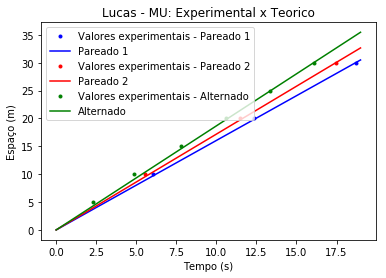

Vel Ricardo - Pareado 1: 1.95439739414 m/s
Vel Ricardo - Pareado 2: 1.86393289842 m/s
Vel Ricardo - Alternado: 1.79748352307 m/s


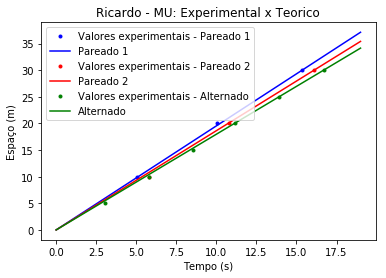

Vel Kaique - Pareado 1: 1.8779342723 m/s
Vel Kaique - Pareado 2: 1.89095493224 m/s
Vel Kaique - Alternado: 1.79748352307 m/s


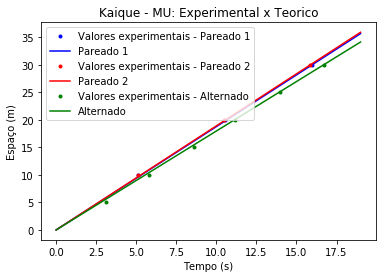

In [6]:
# Uniform Motion
for index,name in enumerate(namesMU):
    calc_vel_and_plot(datasetMU, (4 + index*8), [2, 5], '{} - Pareado 1'.format(name), 'blue')
    calc_vel_and_plot(datasetMU, (8 + index*8), [2, 5], '{} - Pareado 2'.format(name), 'red')
    calc_vel_and_plot(datasetMU, (27 + index*2), [2, 8], '{} - Alternado'.format(name), 'green')
    setup_and_save_plot(['Valores experimentais - Pareado 1','Pareado 1', 'Valores experimentais - Pareado 2', 'Pareado 2', 
                        'Valores experimentais - Alternado', 'Alternado'],
                        "{} - MU: Experimental x Teorico".format(name),
                        "MU-Plot-{}.png".format(name))

Aceleration Victor - Pareado 1: 0.0650814418316 m/s^2
Aceleration Victor - Pareado 2: 0.0623513666822 m/s^2
Aceleration Victor - Alternado: 0.0681569718675 m/s^2


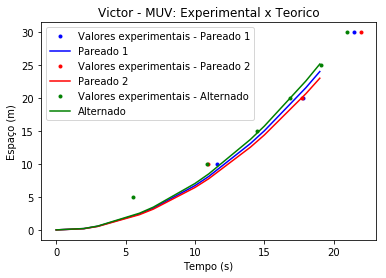

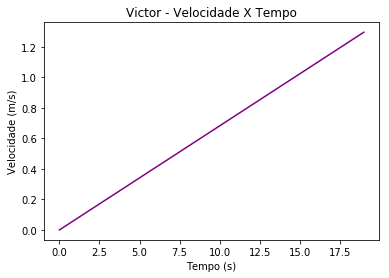

Aceleration Yurick - Pareado 1: 0.0653246230933 m/s^2
Aceleration Yurick - Pareado 2: 0.0632710333346 m/s^2
Aceleration Yurick - Alternado: 0.0665612189045 m/s^2


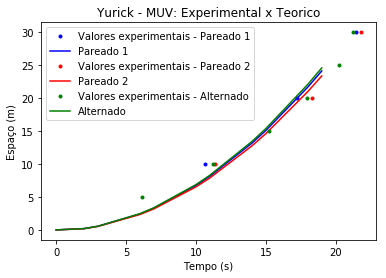

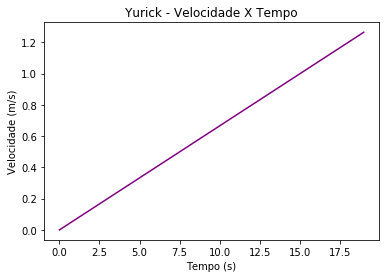

Aceleration Kaique - Pareado 1: 0.0726563953128 m/s^2
Aceleration Kaique - Pareado 2: 0.0856070567609 m/s^2
Aceleration Kaique - Alternado: 0.0576089519703 m/s^2


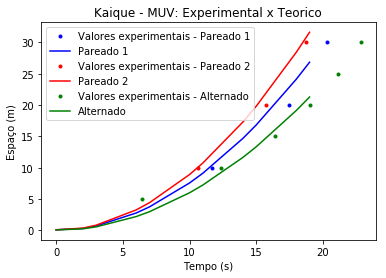

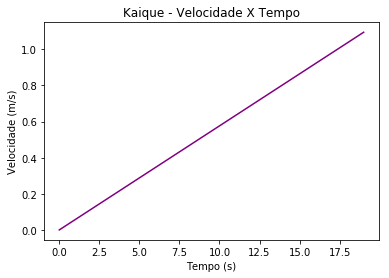

In [7]:
# Uniformly Accelerated Motion
for index,name in enumerate(namesMUV):
    calc_plot(datasetMUV, (4 + index*8),
                      [2, 5], '{} - Pareado 1'.format(name), 'blue')
    calc_plot(datasetMUV, (8 + index*8),
                      [2, 5], '{} - Pareado 2'.format(name), 'red')
    calc_plot(datasetMUV, (27 + index*2),
                      [2, 8], '{} - Alternado'.format(name), 'green')
    setup_and_save_plot(['Valores experimentais - Pareado 1', 'Pareado 1', 'Valores experimentais - Pareado 2', 'Pareado 2',
                         'Valores experimentais - Alternado', 'Alternado'],
                        "{} - MUV: Experimental x Teorico".format(name),
                        "MUV-Plot-{}.png".format(name))
    plot_vel("{} - Velocidade X Tempo".format(name))


### plotPT.py
<p style='text-align: justify;'>O <i>script</i> de plotPT.py tem como objetivo plotar, principalmente, as imagens dos arquivos csv obtidos com a utilização do <i>Physics ToolBox</i>. Assim, o programa recebe como entrada o caminho do arquivo .csv com os dados a serem plotados, o título do gráfico resultante e o nome do arquivo de imagem contendo o gráfico a ser salvo. Um exemplo de execução é: python plotPT.py PhysicsToolBoxData/MUKaique1.csv KaiqueMU KaiqueMUImage, que irá plotar o gráfico contido em PhysicsToolBoxData/MUKaique1.csv, gerando o gráfico com o título KaiqueMU e uma imagem KaiqueMUImage.png.</p>

```python
import numpy as numpy
import matplotlib.pyplot as plt
import pandas as pd
import sys

# exemplo de execucao: python plotPT.py PhysicsToolBoxData/MUKaique1.csv KaiqueMU KaiqueMUImage
# o programa ira plotar o arquivo MUKaique1.csv, com um grafico de titulo "KaiqueMU"e salvar 
# uma imagem KaiqueMUImage.png


# recebe uma lista de str; troca virgulas por pontos
def format_to_float(arr):
    return [s.replace(',', '.') for s in arr]

# caminho do arquivo csv a ser plotado
csvPath = sys.argv[1]

# titulo do grafico
title = sys.argv[2]
image = sys.argv[3]

dataset = pd.read_csv(csvPath, delimiter=';')
subdataset_time = format_to_float(dataset.iloc[0:, 0].values)
subdataset_ax = format_to_float(dataset.iloc[0:, 1].values)
subdataset_ay = format_to_float(dataset.iloc[0:, 2].values)
subdataset_az = format_to_float(dataset.iloc[0:, 3].values)
subdataset_at = format_to_float(dataset.iloc[0:, 4].values)

time = [float(i) for i in subdataset_time]
ax = [float(i) for i in subdataset_ax]
ay = [float(i) for i in subdataset_ay]
az = [float(i) for i in subdataset_az]
at = [float(i) for i in subdataset_at]

plt.plot(time, ax, color = 'red')
plt.plot(time, ay, color = 'blue')
plt.plot(time, az, color = 'yellow')
plt.plot(time, at, color = 'green')

plt.title("Acelerometro - " + title)
plt.xlabel("Tempo")
plt.ylabel("Aceleracao")
plt.savefig(image + ".png")
plt.show()
````

### GenerateSound.java
<p style='text-align: justify;'>O programa generateSound.java é um cliente que importa a biblioteca criada por Robert Sedgewick e Kevin Wayne, StdAudio, que pode ser encontrada em [StdAudio.java](https://introcs.cs.princeton.edu/java/15inout/StdAudio.java.html), utilizado para a criação do metrônomo ascendente para a realização do movimento uniformemente variado. Os dados utilizados no programa foram arbitrários, basicamente escolhidos para uma melhor adequação ao experimento. O programa se encontra em anexo na pasta <strong>Metronome</strong>, junto com alguns arquivos mp3 gerados com ele.</p>


```java
import edu.princeton.cs.algs4.StdAudio;

public class GenerateSound {

    // create a note (sine wave) of the given frequency (Hz), for the given
    // duration (seconds) scaled to the given volume (amplitude)
    private static double[] note(double hz, double duration, double amplitude) {
        int n = (int) (StdAudio.SAMPLE_RATE * duration);
        double[] a = new double[n + 1];
        for (int i = 0; i <= n; i++)
            a[i] = amplitude * Math.sin(2 * Math.PI * i * hz / StdAudio.SAMPLE_RATE);
        return a;
    }

    public static void main(String[] args) {
        // scale increments
        int[] steps = { 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                0, 0, 0, 0, 0, 0, 0, 0, 0, 0 };
        double time = 1500;
        for (int i = 0; i < steps.length; i++) {
            double hz = 440.0 * Math.pow(2, steps[i] / 12.0);
            StdAudio.play(note(hz, 0.1, 0.5));
            try {
                Thread.sleep((int) time);
                time = time / 1.1;
            } catch (InterruptedException ex) {
                Thread.currentThread().interrupt();
            }
        }
        // need to call this in non-interactive stuff so the program doesn't terminate
        // until all the sound leaves the speaker.
        StdAudio.close();
    }    
}
```

## Verificação do Algoritmo

<p style="text-align: center"></p>

## Dados

### Dados Coletados no Experimento

<p style='text-align: justify;'>Todos os dados coletados durante a execução do experimento estão como segue abaixo. Para cada tipo de movimento, uniforme e uniformemente variado, tem-se a informação da disposição dos cronômetros, pareados ou intercalados. Além disso, consta o nome do participante que realizou a travessia seguido do número da mesma, com os tempos para o deslocamento das distâncias descritas. Há também, quando os cronômetros estão intercalados, o registro de qual cronômetro marcou determinado tempo, possibilitando a comparação entre eles. Um exemplo, Lucas, em sua primeira travessia por meio do movimento uniforme, com medição de cronômetros pareados, demorou 6 segundos entre 0m e 10m, e 6,06 segundos entre 10m e 20m, pelas medições do cronômetro 1.</p>

| Movimento Uniforme (MU) |         |        |         |         |  |                          |       |       |        |         |         |         |         | 
|-------------------------|---------|--------|---------|---------|--|--------------------------|-------|-------|--------|---------|---------|---------|---------| 
| Cronômetros Pareados    |         |        |         |         |  | Cronômetros Intercalados |       |       |        |         |         |         |         | 
| Lucas 1                 | Ponto   | 0m-10m | 10m-20m | 20m-30m |  | Lucas                    | Ponto | 0m-5m | 5m-10m | 10m-15m | 15m-20m | 20m-25m | 25m-30m | 
|                         | Crono 1 | 6      | 6,06    | 6,06    |  |                          | Tempo | 2,3   | 2,55   | 2,93    | 2,8     | 2,77    | 2,72    | 
|                         | Crono 2 | 6,05   | 6,6     | 6,61    |  | Ricardo                  | Ponto | 0m-5m | 5m-10m | 10m-15m | 15m-20m | 20m-25m | 25m-30m | 
|                         | Média   | 6,025  | 6,33    | 6,335   |  |                          | Tempo | 3,03  | 2,79   | 2,71    | 2,65    | 2,75    | 2,76    | 
| Lucas 2                 | Ponto   | 0m-10m | 10m-20m | 20m-30m |  | Kaique                   | Ponto | 0m-5m | 5m-10m | 10m-15m | 15m-20m | 20m-25m | 25m-30m | 
|                         | Crono 1 | 5,5    | 6       | 5,9     |  |                          | Tempo | 3,1   | 2,72   | 2,78    | 2,58    | 2,82    | 2,69    | 
|                         | Crono 2 | 5,59   | 5,89    | 6,03    |  |                          |       |       |        |         |         |         |         | 
|                         | Média   | 5,545  | 5,945   | 5,965   |  |                          |       |       |        |         |         |         |         | 
| Ricardo 1               | Ponto   | 0m-10m | 10m-20m | 20m-30m |  |                          |       |       |        |         |         |         |         | 
|                         | Crono 1 | 5      | 5       | 5,3     |  |                          |       |       |        |         |         |         |         | 
|                         | Crono 2 | 5,05   | 5,08    | 5,27    |  |                          |       |       |        |         |         |         |         | 
|                         | Média   | 5,025  | 5,04    | 5,285   |  |                          |       |       |        |         |         |         |         | 
| Ricardo 2               | Ponto   | 0m-10m | 10m-20m | 20m-30m |  |                          |       |       |        |         |         |         |         | 
|                         | Crono 1 | 5,9    | 5,4     | 5,6     |  |                          |       |       |        |         |         |         |         | 
|                         | Crono 2 | 5,64   | 5,45    | 5,27    |  |                          |       |       |        |         |         |         |         | 
|                         | Média   | 5,77   | 5,04    | 5,285   |  |                          |       |       |        |         |         |         |         | 
| Kaique 1                | Ponto   | 0m-10m | 10m-20m | 20m-30m |  |                          |       |       |        |         |         |         |         | 
|                         | Crono 1 | 5      | 5,5     | 5,4     |  |                          |       |       |        |         |         |         |         | 
|                         | Crono 2 | 5,18   | 5,34    | 5,53    |  |                          |       |       |        |         |         |         |         | 
|                         | Média   | 5,09   | 5,42    | 5,465   |  |                          |       |       |        |         |         |         |         | 
| Kaique 2                | Ponto   | 0m-10m | 10m-20m | 20m-30m |  |                          |       |       |        |         |         |         |         | 
|                         | Crono 1 | 5      | 5,4     | 5,4     |  |                          |       |       |        |         |         |         |         | 
|                         | Crono 2 | 5,19   | 5,33    | 5,41    |  |                          |       |       |        |         |         |         |         | 
|                         | Média   | 5,095  | 5,365   | 5,405   |  |                          |       |       |        |         |         |         |         | 


| Movimento Uniformemente Variado (MUV) |         |        |         |         |  |  |                          |       |         |          |           |           |           |           | 
|---------------------------------------|---------|--------|---------|---------|--|--|--------------------------|-------|---------|----------|-----------|-----------|-----------|-----------| 
| Cronômetros Pareados                  |         |        |         |         |  |  | Cronômetros Intercalados |       |         |          |           |           |           |           | 
| Victor 1                              | Ponto   | 0m-10m | 10m-20m | 20m-30m |  |  | Victor                   | Ponto | 0m a 5m | 5m a 10m | 10m a 15m | 15m a 20m | 20m a 25m | 25m a 30m | 
|                                       | Crono 1 | 11,53  | 6,41    | 3,59    |  |  |                          | Tempo | 5,51    | 5,33     | 3,64      | 2,36      | 2,28      | 1,86      | 
|                                       | Crono 2 | 11,67  | 6,01    | 3,73    |  |  | Yurick                   | Ponto | 0m a 5m | 5m a 10m | 10m a 15m | 15m a 20m | 20m a 25m | 25m a 30m | 
|                                       | Média   | 11,6   | 6,21    | 3,66    |  |  |                          | Tempo | 6,14    | 5,09     | 4         | 2,71      | 2,3       | 0,99      | 
| Victor 2                              | Ponto   | 0m-10m | 10m-20m | 20m-30m |  |  | Kaique                   | Ponto | 0m a 5m | 5m a 10m | 10m a 15m | 15m a 20m | 20m a 25m | 25m a 30m | 
|                                       | Crono 1 | 11,03  | 6,76    | 4,14    |  |  |                          | Tempo | 6,43    | 5,96     | 3,99      | 2,64      | 2,12      | 1,68      | 
|                                       | Crono 2 | 10,81  | 6,88    | 4,25    |  |  |                          |       |         |          |           |           |           |           | 
|                                       | Média   | 10,92  | 6,82    | 4,195   |  |  | Victor                   | Ponto | 0m a 5m | 0m a 10m | 5m a 15m  | 10m a 20m | 15m a 25m | 20m a 30m | 
| Yurick 1                              | Ponto   | 0m-10m | 10m-20m | 20m-30m |  |  |                          | Tempo | 5,51    | 10,84    | 8,97      | 6         | 4,64      | 4,14      | 
|                                       | Crono 1 | 9,94   | 6,46    | 4,29    |  |  | Yurick                   | Ponto | 0m a 5m | 0m a 10m | 5m a 15m  | 10m a 20m | 15m a 25m | 20m a 30m | 
|                                       | Crono 2 | 11,41  | 6,7     | 4,06    |  |  |                          | Tempo | 6,14    | 11,23    | 9,09      | 6,71      | 5,01      | 3,29      | 
|                                       | Média   | 10,675 | 6,58    | 4,175   |  |  | Kaique                   | Ponto | 0m a 5m | 0m a 10m | 5m a 15m  | 10m a 20m | 15m a 25m | 20m a 30m | 
| Yurick 2                              | Ponto   | 0m-10m | 10m-20m | 20m-30m |  |  |                          | Tempo | 6,43    | 12,39    | 9,95      | 6,63      | 4,76      | 3,8       | 
|                                       | Crono 1 | 11,52  | 6,93    | 3,15    |  |  |                          |       |         |          |           |           |           |           | 
|                                       | Crono 2 | 11,23  | 6,99    | 3,73    |  |  |                          |       |         |          |           |           |           |           | 
|                                       | Média   | 11,375 | 6,96    | 3,44    |  |  |                          |       |         |          |           |           |           |           | 
| Kaique 1                              | Ponto   | 0m-10m | 10m-20m | 20m-30m |  |  |                          |       |         |          |           |           |           |           | 
|                                       | Crono 1 | 11,6   | 5,68    | 3,15    |  |  |                          |       |         |          |           |           |           |           | 
|                                       | Crono 2 | 11,76  | 5,8     | 2,65    |  |  |                          |       |         |          |           |           |           |           | 
|                                       | Média   | 11,68  | 5,74    | 2,9     |  |  |                          |       |         |          |           |           |           |           | 
| Kaique 2                              | Ponto   | 0m-10m | 10m-20m | 20m-30m |  |  |                          |       |         |          |           |           |           |           | 
|                                       | Crono 1 | 10,64  | 5,04    | 3,02    |  |  |                          |       |         |          |           |           |           |           | 
|                                       | Crono 2 | 10,68  | 5,12    | 2,94    |  |  |                          |       |         |          |           |           |           |           | 
|                                       | Média   | 10,66  | 5,08    | 2,98    |  |  |                          |       |         |          |           |           |           |           | 



### <i>Physics ToolBox Sensor</i>
<p style='text-align: justify;'>Para melhor compreensão dos movimentos realizados e resultados obtidos durante o experimento, foram plotados gráficos a partir das informações coletadas com o uso do sensor Physics ToolBox Suite. Todos os gráficos com os dados de cada travessia estão localizados no diretório GraficosAceleracao, eles podem ser gerados utilizando o algoritmo plotPT.py. Os arquivos gerados pelo próprio <i>Physics ToolBox</i> (.csv) estão localizados no diretório PhysicsToolBoxData, com nomes intuitivos, por exemplo, MUKaique1 corresponde à primeira travessia do participante Kaique realizando o movimento uniforme com os cronômetros pareados; MUKaiqueAlternado1 corresponde à primeira travessia do participante realizando o movimento uniforme com os cronômetros intercalados. No final também há um exemplo do gráfico aceleração por tempo gerado pelo próprio sensor.</p>
<p>
    <img align="left" src="GraficosAceleracao/MULucas1.png" width="450" height="450">
    <img align="rigth" src="GraficosAceleracao/MUKojo2.png" width="450" height="450">
</p>
<p>
    <img align="left" src="GraficosAceleracao/MUKaiqueAlternado3.png" width="450" height="450">
    <img align="rigth" src="GraficosAceleracao/MUKojoAlternado2.png" width="450" height="450">
</p>
<p>
    <img align="left" src="GraficosAceleracao/MUVYurick2.png" width="450" height="450">
    <img align="rigth" src="GraficosAceleracao/MUVKaique1.png" width="450" height="450">
</p>
<p>
    <img align="left" src="GraficosAceleracao/MUVYurickAlternado.png" width="450" height="450">
    <img align="rigth" src="GraficosAceleracao/MUVVictorAlternado.png" width="450" height="450">
</p>
<p>
    <img align="center" src="GraficosAceleracao/Toolbox-AceleracaoTempo.png" width="450" height="450">
</p>

## Análise

### Movimento Uniforme(MU)
<p style='text-align: justify;'>Com a execução do script analysisMU.py percebe-se que o experimento ocorreu como esperado, ou seja, os dados captados durante o experimento da travessia se aproximam bastante aos teóricos, gerados pela simulação. </p>
<p style='text-align: justify;'>Observando o gráfico "Kaique - MU: Experimental X Teorico", percebe-se que, pela simulação, o participante praticamente manteve velocidades semelhantes durante as três travessias, isso pode ser constatado por meio das retas que denotam sua velocidade teórica e percebendo que para diversos valores de tempo(eixo do tempo), a posição(eixo da posição) do participante é bem semelhante nas três travessias, com destaque para a comparação das duas travessias com cronômetros pareados.</p>
<p style='text-align: justify;'>Para o gráfico "Lucas - MU: Experimental X Teorico", pode-se perceber que houve uma pequena variação nas velocidades entre os experimentos, isso porque quanto maior o tempo, maior a variação de posição entre as travessias. Um exemplo é o tempo = 15s, em que a linha verde está mais ao alto(cronômetros alternados), a linha vermelha(cronômetro pareado) ao meio e a linha azul(cronômetro pareado) mais abaixo, com um espaçamento vertical entre elas bem considerável. Tal fato se deve, provavelmente, a alguns erros durante o procedimento experimental, dos quais a maior causa pode ser devido a falhas no acompanhamento do metrônomo de auxílio.</p>
<p style='text-align: justify;'>Já o gráfico "Ricardo - MU: Experimental X Teorico", pode ser considerado uma coleta de valores intermediária, ao se comparar com os dois gráficos citados acima, e considerando a qualidade de aquisição de dados. Pode-se constatar que as três travessias foram feitas baseadas em velocidades teóricas bem semelhantes, percebendo pequenas variações entre os dados de cada uma. Há uma diferença entre os movimentos teóricos de cada travessia, assim como o gráfico do Lucas, mas uma variação bem menor e aceitável para um procedimento experimental.</p>
<p style='text-align: justify;'>Logo, analisando todos os gráficos e sempre comparando os valores teóricos com os experimentais, pode-se perceber que a simulação foi bastante plausível, levando em conta que todos os pontos do gráfico, estão em cima das retas as quais eles pertencem ou muito próximo, ou seja, a simulação gerou todos os dados com bastante precisão e proximidade em relação à realidade experimental.</p>

### Movimento Uniformemente Variado(MUV)

<p style='text-align: justify;'>Já com a execução do script analysisMUV.py percebe-se que o experimento também ocorreu como esperado, com os dados captados durante o experimento da travessia diferindo pouco dos teóricos, gerados pela simulação. </p>
<p style='text-align: justify;'>Observando o gráfico "Yurick - MUV: Experimental X Teorico", é possível observar que o participante não se movimentou com velocidade constante, visto que o seu gráfico de velocidade pelo tempo é uma reta crescente, mas sim de maneira acelerada, percorrendo em uma mesma quantidade de tempo espaços cada vez maiores à medida em que prosseguia. Assim, também é possível ver que o participante se movimentou não apenas de maneira acelerada, mas também com uma aceleração constante e de modo extremamente semelhante nas três travessias. Podemos comprovar isso ao observar que as linhas do gráfico de velocidade por tempo se encontram bem próximas e ao observar valores do gráfico de espaço por tempo. Analisando os pontos em tempo=5s, 10s e 15s, obtemos espaço~=2.5m, 7m e 15m respectivamente, o que mostra um aumento gradual e constante no espaço percorrido pelo participante em um mesmo intervalo de tempo.</p>
<p style='text-align: justify;'>Para o gráfico "Victor - MUV: Experimental X Teórico", observamos resultados bem semelhantes ao do gráfico analisado anteriormente, com uma única diferença sendo no final da travessia, onde houve uma pequena disparidade entre as linhas do gráfico, resultando em uma pequena mudança na aceleração entre os finais das travessias mas que não afeta o movimento que continua tendo uma aceleração constante.</p>
<p style='text-align: justify;'>Já no gráfico "Kaique - MUV: Experimental X Teórico", podemos perceber certas divergências consideráveis entre as linhas do gráfico, o que significa uma variação no movimento das três travessias. Isso resulta em uma diferença entre as acelerações o que significa que mesmo estando acelerado, o movimento em alguma ou algumas das travessias pode não ter sido uniformemente variado no percurso todo. Essas variações se devem a alguns erros no momento do experimento, tanto com o acompanhamento do metrônomo quanto alguma passada mais diferente do participante em certo ponto.</p>
<p style='text-align: justify;'>Logo, analisando todos os gráficos e comparando os valores teóricos com os experimentais é possível perceber uma pequena variação entre os valores experimentais e os simulados, que pode ser dado como resultado de pequenas complicações no experimento com o metrônomo acelerado. Entretanto, essas pequenas diferenças são esperadas já que o experimento para esse movimento é um pouco mais complicado de ser reproduzido e assim pode se perceber que a simulação do movimento uniformemente variado também foi bastante plausível, tomando em conta a posição até que próxima dos pontos em relação às suas devidas retas, o que significa que os dados gerados pela simulação se aproximaram com o procedimento experimental.</p>

## Interpretação

### Movimento Uniforme(MU)
<p style='text-align: justify;'>Já foi feita a análise gráfica, mas é importante interpretá-los de acordo com a teoria da Cinemática. Portanto, um aspecto simples de ser constatado é que o gráfico <i>posição x tempo</i> gera uma reta, isso porque no movimento uniforme, o gráfico é dado por:
$$x(t) = a + b.t$$
ou seja, uma reta. Além disso, sabe-se que a velocidade média do movimento é dada por:
$$v = \frac{\Delta x}{\Delta t} = \frac{x(t_2) - x(t_1)}{t_2 - t_1}$$
Com isso, após certas manipulações algébricas e geométricas, obtém-se a equação horária do movimento uniforme:
$$x(t) = x_0 + v.\Delta t = x_0 + v.(t - t_0)$$
Além disso, sabendo que <i>v</i> é dada dessa forma, então a velocidade instantânea v no tempo t é:
$$v(t) = \lim_{t\rightarrow 0} \frac{x(t+\Delta t) - x(t)}{\Delta t} = \lim_{t\rightarrow 0} \frac{\Delta x}{\Delta t} = \frac{dx}{dt}$$ </p>
<p style='text-align: justify;'>Sabendo que os <i>scripts</i> que simulam os movimentos utilizam toda a teoria descrita, bem como as fórmulas e equações citadas acima, então para facilitar, faremos a interpretação dos dados por meio da simulação.</p>
<p style='text-align: justify;'>Assim, para melhor efeito de comparação, pode-se utilizar os dados experimentais e verificar sua proximidade com os dados fornecidos pela simulação, por meio de alguns exemplos.</p>
<p style='text-align: justify;'>Iniciando com a primeira travessia do participante Ricardo com cronômetros pareados, percebe-se que quando t = 5.025s, tem-se s = 10m. Comparando com a simulação, obteve-se que para t = 5s, então s(t) = 9.770m, ou seja, um dado bem próximo ao experimental. Quando t = 10.065s, Ricardo encontrava-se aos 20m da travessia, ou seja, s = 20m. A simulação diz que para t = 10s, então s(t) = 19.544m, o que novamente denota uma variação nos dados muito pequena. Quando t = 15.35s, tem-se que Ricardo estava em s = 30m, logo completou-se a travessia. Comparando novamente com a simulação, é dito que para t = 15s, então s(t) = 29.316m.</p>
<p style='text-align: justify;'>É importante salientar que há alguns casos em que o erro experimental é um pouco maior. Por exemplo, a travessia do participante Kaique quando os cronômetros estão alternados apresenta uma certa variação dos valores simulados com aqueles coletados, porém nada muito exagerado. Isso pode ser verificado repetindo o procedimento acima. Aos 2.3s do experimento, Kaique encontrava-se aos 5m da travessia, enquanto que na simulação, para t = 2s, então s(t) = 3.595m. Aos 4.85s do experimento, Kaique encontrava-se aos 10m da travessia, enquanto que na simulação, para t1 = 4s, então s(t1) = 7.190m, e para t2 = 5s, então s(t2) = 8.987m. Aos 7.78s do experimento, Kaique encontrava-se aos 15m da travessia, enquanto que na simulação, para t1 = 7s, então s(t1) = 12.582m, e para t2 = 8s, então s(t2) = 14.380m. Apenas com essas três comparações, é possível perceber que a variação dos valores teóricos com os experimentais é maior com o exemplo acima, do participante Ricardo.</p>
<p style='text-align: justify;'>Como o movimento uniforme é dado por uma função afim, então o coeficiente angular do gráfico corresponde à velocidade média. Dessa forma, percebe-se que no gráfico "Lucas - MU: Experimental x Teorico", a reta verde(cronômetros alternados) possui um coeficiente angular maior do que a reta azul(cronômetros pareados), consequentemente, a velocidade do movimento que a reta verde representa é maior do que aquele da reta azul. Para uma visualização gráfica, pode-se olhar que para t = 17.5s, tem-se s_azul(t) < 30m e s_verde(t) > 30m.</p>
<p style='text-align: justify;'>Em geral, pode-se dizer, agora com um rigor mais técnico e teórico, que a simulação teve muito respeito à realidade experimental e gerou resultados que correspondem ao experimento realizado, em relação ao movimento uniforme.</p>

### Movimento Uniformemente Variado (MUV)
<p style='text-align: justify;'>Já para interpretar o movimento uniformemente variado, é preciso dar atenção não só à velocidade mas também à aceleração do objeto. Assim, sabe-se que a aceleração instantânea do movimento é dada por:
$$a(t) = \frac{dv}{dt} = \frac{d^2x}{dt^2}$$
Com isso, após certas manipulações algébricas, obtém-se a equação horária do movimento uniformemente variado:
$$x(t) = x_0 + v_0(t - t_0) + \frac{1}{2}a(t - t_0)^2$$
Como a velocidade também é importante no estudo do movimento uniformemente variado, interessa também exprimí-la em função da posição x ao invés do tempo t. Assim, fazendo as devidas substituições, chegamos a: 
$$v^2 = v_0^2 + 2a(x - x_0)$$</p>
<p style='text-align: justify;'>Para efeito de comparação, novamente pode-se utilizar os dados experimentais e verificar a proximidade com os dados fornecidos pela simulação, como fazem os exemplos a seguir.</p>
<p style='text-align: justify;'>Observando a travessia do participante Victor com cronômetros intercalados, percebe-se que quando t=10.84s, tem se s = 10m. Comparando com a simulação, obteve-se para t = 11s um valor de s = 7.08m, o que mostra uma disparidade considerável entre os dados. Já quando t = 16.87, tem-se s = 20m enquanto que na simulação para t = 17s obteve-se s = 18.06, o que mostra um erro experimental menor que o anterior, mas ainda considerável.</p>
<p style='text-align: justify;'>É possível observar que em alguns casos, o erro experimental se apresenta menor que o caso anterior. Como exemplo, temos a segunda travessia do participante Kaique com cronômetros pareados. Nessa travessia, para t = 15.74s tem-se s = 20m enquanto na simulação para t = 16s, obteve-se s = 19.81m, uma diminuição grande no erro experimental e uma boa aproximação entre os dados experimentais e simulados.</p>
<p style='text-align: justify;'>Em resumo, pode-se dizer que para o movimento uniformemente variado, o qual a reprodução fiel é um pouco mais complicada de se obter comparada ao movimento uniforme, a simulação chega a se aproximar à realidade experimental, entretanto gera resultados não totalmente condizentes com os obtidos pelo experimento, isto é, é possível observar um erro experimental considerável entre os dados simulados e os coletados, sendo esse erro proveniente da maior dificuldade de reprodução do fenômeno no momento do experimento.</p> 

## Conclusão

<p style='text-align: justify;'>
Ao analisar os gráficos e os dados experimentais é possível verificar que, para o Movimento Uniforme, o experimento e a simulação ficaram bem próximos, com pouca variação. Nos gráficos gerados, por exemplo, pode-se ver que os pontos localizam-se próximos às retas simuladas. Sendo assim, podemos concluir que o experimento relacionado ao MU foi bem executado.
</p>
<p style='text-align: justify;'>
No entanto, ao analisarmos o experimento para o Movimento Uniformemente Variado, é possível verificar uma divergência considerável entre o simulado e o experimental. Nos gráficos gerados, as curvas experimentais tem uma ascendência mais suave em comparação aos valores simulados.
</p>
<p style='text-align: justify;'>
Após breve discussão, o grupo concordou que o erro no experimento relacionado ao MUV foi o fator humano. O algoritmo criado para gerar o metrônomo acelerado foi considerado correto e, ao analisar os vídeos, notou-se que o movimento feito pelos participantes não era natural. Havia um "delay" entre um toque do metrônomo e um passo, o que criou as divergências nos dados.
</p>
<p style='text-align: justify;'>
Por fim, o grupo aprovou os resultados do Movimento Uniforme e concordou que há espaço para melhorias em relação ao Movimento Uniformemente Variado.
</p>

## Log

- Realização do experimento: 2 dias
- Criação do script: 3 dias
- Elaboração do relatório: 3 dias
- Edição do vídeo: 1 dia 

## Contribuição dos Autores

<p style='text-align: justify;'>Victor Hugo, Ricardo Kojo e Yurick Honda escreveram e implementaram os scripts para análise e desenho dos gráficos. Todos os autores participaram nos experimentos e na coleta de dados. Lucas Civile criou e editou o vídeo do experimento. Kaique Komata e Yurick Honda analisaram os dados obtidos e escreveram esse manuscrito. Todos os autores leram, revisaram e aprovaram esse manuscrito.</p>

## Vídeo
<b>https://www.youtube.com/watch?v=Ec6GvPaMQ6c</b>